In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

notebook_dir = os.getcwd()
csv_name = 'mushra.csv'
csv_path = os.path.join(notebook_dir, csv_name)

df = pd.read_csv(csv_path, index_col=0)
total_participants = df['email'].nunique()
print(f'Total participants: {total_participants}')

Total participants: 53


In [3]:
trial_ids = df['trial_id'].unique()
stats_df = pd.DataFrame(columns=['config', 'trial_id', 'algo', 'mean_rating', 'std_rating', 'mean_rating_time', 'std_rating_time'])
algo_names = df['rating_stimulus'].unique()
for trial_id in trial_ids:
    trial_df = df[df['trial_id'] == trial_id]
    for algo in algo_names:
        ratings = trial_df[trial_df['rating_stimulus'] == algo]['rating_score']
        rating_times = trial_df[trial_df['rating_stimulus'] == algo]['rating_time']
        mean_rating = ratings.mean()
        std_rating = ratings.std()
        mean_rating_time = rating_times.mean()
        std_rating_time = rating_times.std()
        new_row = pd.DataFrame({
            'config': [trial_id.split('_')[0]],
            'trial_id': [trial_id.split('_')[1]],
            'algo': [algo],
            'mean_rating': [mean_rating],
            'std_rating': [std_rating],
            'mean_rating_time': [mean_rating_time],
            'std_rating_time': [std_rating_time]
        })
        stats_df = pd.concat([stats_df, new_row], ignore_index=True)

/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_32804/2964926454.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, new_row], ignore_index=True)


# participants analysis

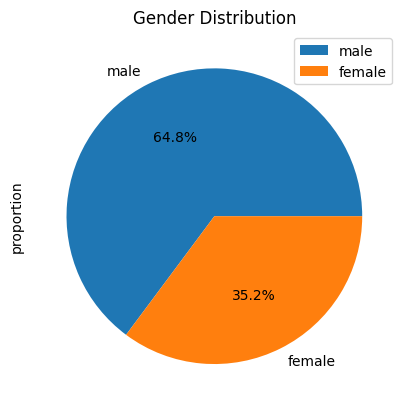

In [4]:
# gendar ratio
gendar_ratio = df['gender'].value_counts(normalize=True)
plt.figure()
gendar_ratio.plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.legend()
plt.show()


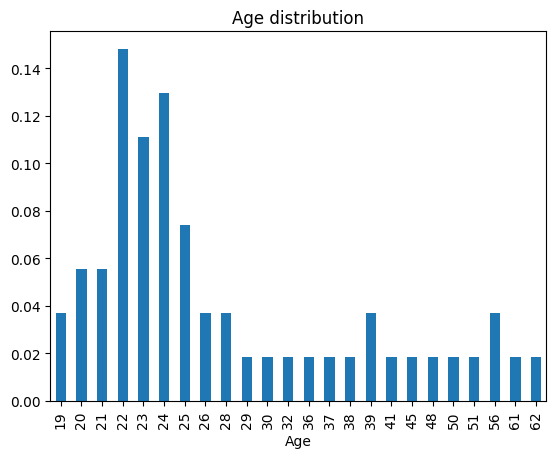

In [5]:
# age distribution
df['age'] = df['age'].apply(lambda x: 30 if x > 100 else x) # default value is 30
age_distribution = df['age'].value_counts(normalize=True)

age_distribution = age_distribution.sort_index()
plt.figure()
age_distribution.plot(kind='bar')
plt.title('Age distribution')
plt.xlabel('Age')
plt.show()


# rating analyses

/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_32804/2095948089.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_32804/2095948089.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_32804/2095948089.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_32804/2095948089.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]


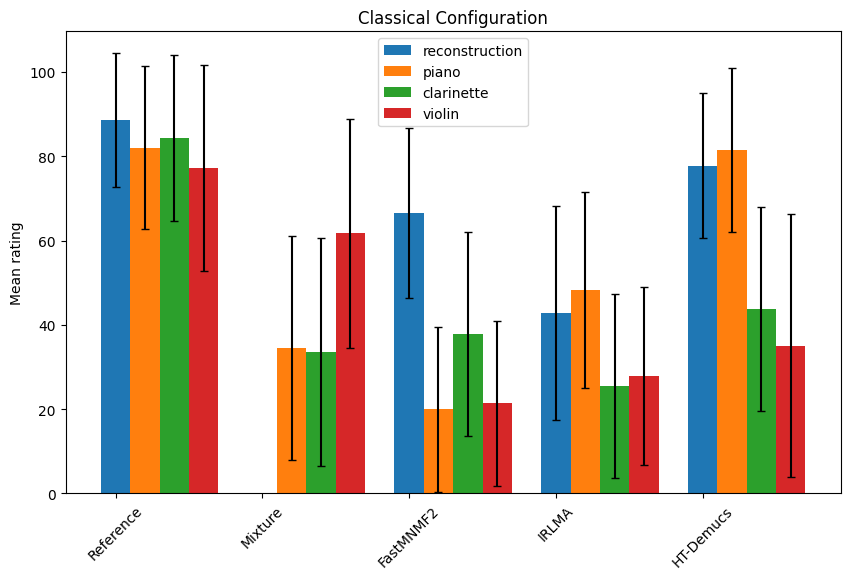

In [6]:
config = 'classical'

fig, ax = plt.subplots(figsize=(10, 6))

algo_names = ['reference', 'mix', 'fastmnmf2', 'irlma', 'demuc']
trial_ids = stats_df[stats_df['config']==config]['trial_id'].unique()

bar_width = 0.8 / len(trial_ids)

for i, trial_id in enumerate(trial_ids):
    trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
    # sort by algo_names which is an external list
    trial_df['algo_names'] = pd.Categorical(trial_df['algo'], categories=algo_names, ordered=True)
    trial_df = trial_df.sort_values(by='algo_names')
    # trial_df = trial_df.sort_values(by='algo')

    categories = trial_df['algo'][0:5]
    values = trial_df['mean_rating'][0:5]
    errors = trial_df['std_rating'][0:5]
    # ax.bar(categories, values, yerr=errors, label=label_name)

    x_positions = np.arange(len(categories)) + i * bar_width
    ax.bar(x_positions, values, yerr=errors, width=bar_width, label=trial_id, capsize=3)
    ax.set_xticks(np.arange(len(categories)))
    ax.set_xticklabels(['Reference', 'Mixture', 'FastMNMF2', 'IRLMA', 'HT-Demucs'])

ax.set_ylabel('Mean rating')
ax.set_title('Classical Configuration')
ax.legend()
plt.xticks(rotation=45)
plt.show()


/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_32804/2832040686.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_32804/2832040686.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_32804/2832040686.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_32804/2832040686.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
/var/folders/4v/n41d

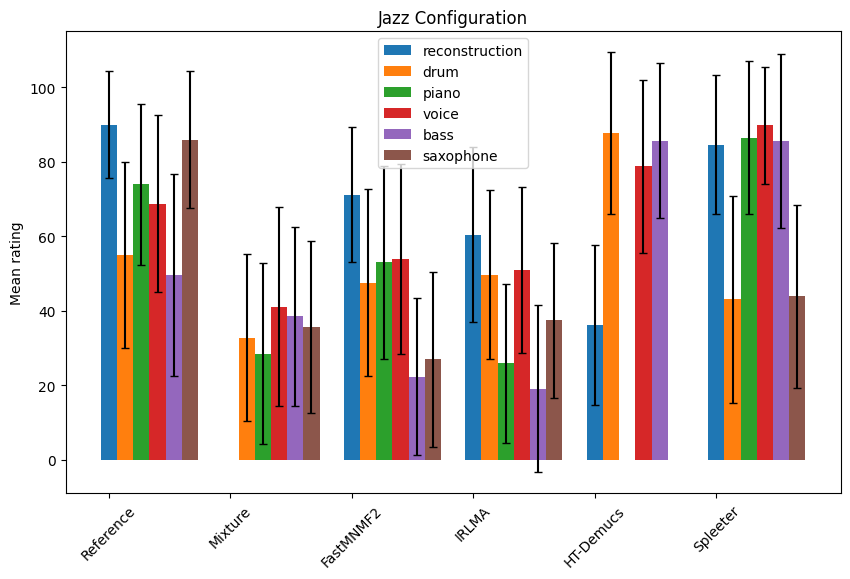

In [7]:
config = 'jazz'

fig, ax = plt.subplots(figsize=(10, 6))

algo_names = ['reference', 'mix', 'fastmnmf2', 'irlma', 'demuc', 'spleeter']
trial_ids = stats_df[stats_df['config']==config]['trial_id'].unique()

bar_width = 0.8 / len(trial_ids)

for i, trial_id in enumerate(trial_ids):
    trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
    # sort by algo_names which is an external list
    trial_df['algo_names'] = pd.Categorical(trial_df['algo'], categories=algo_names, ordered=True)
    trial_df = trial_df.sort_values(by='algo_names')
    # trial_df = trial_df.sort_values(by='algo')

    categories = trial_df['algo']
    values = trial_df['mean_rating']
    errors = trial_df['std_rating']
    # ax.bar(categories, values, yerr=errors, label=label_name)

    x_positions = np.arange(len(categories)) + i * bar_width
    ax.bar(x_positions, values, yerr=errors, width=bar_width, label=trial_id, capsize=3)
    ax.set_xticks(np.arange(len(categories)))
    ax.set_xticklabels(['Reference', 'Mixture', 'FastMNMF2', 'IRLMA', 'HT-Demucs', 'Spleeter'])

ax.set_ylabel('Mean rating')
ax.set_title('Jazz Configuration')
ax.legend()
plt.xticks(rotation=45)
plt.show()


# time for rating analyses

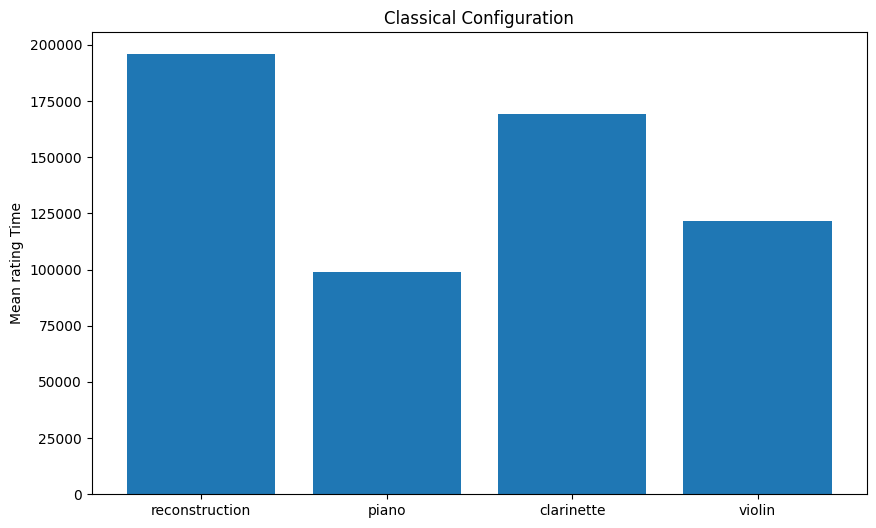

In [8]:
config = 'classical'

fig, ax = plt.subplots(figsize=(10, 6))

trial_ids = stats_df[stats_df['config']==config]['trial_id'].unique()

bar_width = 0.8 / len(trial_ids)

rating_times = stats_df[stats_df['config'] == config]['mean_rating_time'][stats_df['algo'] == 'fastmnmf2']
# rating_time_errors = stats_df[stats_df['config'] == config]['std_rating_time']
plt.bar(np.arange(len(rating_times)), rating_times)
plt.xticks(np.arange(len(rating_times)), trial_ids)
plt.ylabel('Mean rating Time')
plt.title('Classical Configuration')
plt.show()


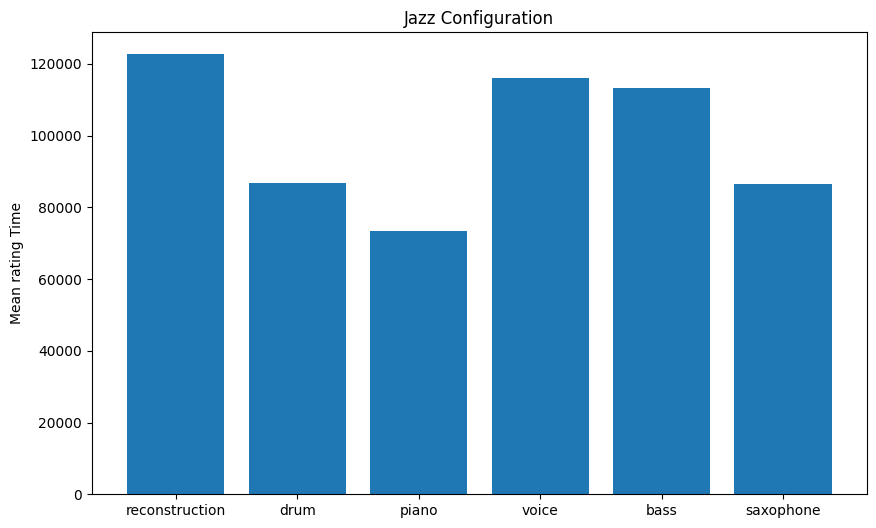

In [9]:
config = 'jazz'

fig, ax = plt.subplots(figsize=(10, 6))

trial_ids = stats_df[stats_df['config']==config]['trial_id'].unique()

bar_width = 0.8 / len(trial_ids)

rating_times = stats_df[stats_df['config'] == config]['mean_rating_time'][stats_df['algo'] == 'fastmnmf2']
# rating_time_errors = stats_df[stats_df['config'] == config]['std_rating_time']
plt.bar(np.arange(len(rating_times)), rating_times)
plt.xticks(np.arange(len(rating_times)), trial_ids)
plt.ylabel('Mean rating Time')
plt.title('Jazz Configuration')
plt.show()
